In [1]:
import torch
from torchvision.transforms import v2 as transforms
from torchvision import datasets
from CustomTransforms import ReflectPad
import matplotlib.pyplot as plt

Set the expected image input dimensions for your chosen CNN

In [2]:
#most CNN use 224x224
#for Inception use 299 x 299
image_input_width = 224
image_input_height = 224

Setup a PyTorch Transform pipeline

In [3]:
transform = transforms.Compose([
        transforms.ToImage(), 
        transforms.ToDtype(torch.float32, scale=True),
        ReflectPad(image_input_width,image_input_height),       
        transforms.Resize((image_input_width,image_input_height),antialias=True),
                
    ])  

For simplicity this loads a dataset from the sub-folder images/ where some sample files are provided.

In [4]:
data_training_directory = "images/"
dataset = datasets.ImageFolder(data_training_directory, transform=transform)

Create a PyTorch DataLoader and load the images and their labels.

In [ ]:
loader = torch.utils.data.DataLoader(
        dataset, 
        batch_size=16,  
    )

train_features, train_labels = next(iter(loader))

A simple for loop to step through the loaded images so you can view the ouput from the Transform pipeline

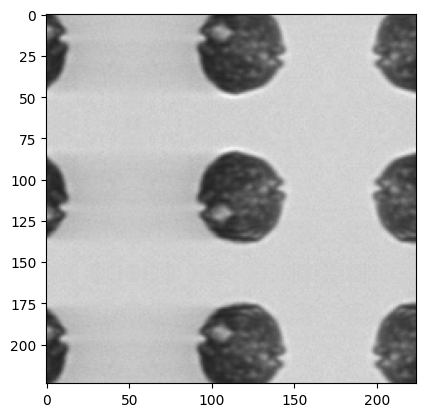

Label: 0: Alexandrium


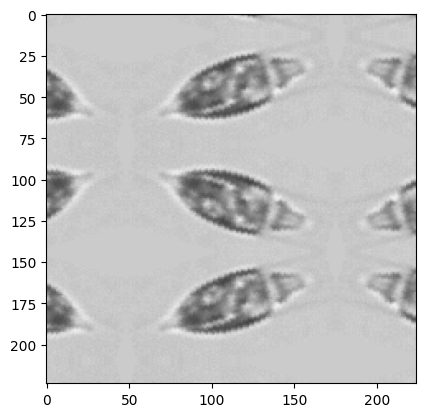

Label: 1: Amphidinium


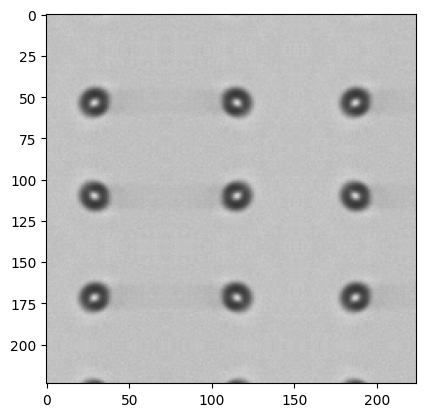

Label: 2: Bead


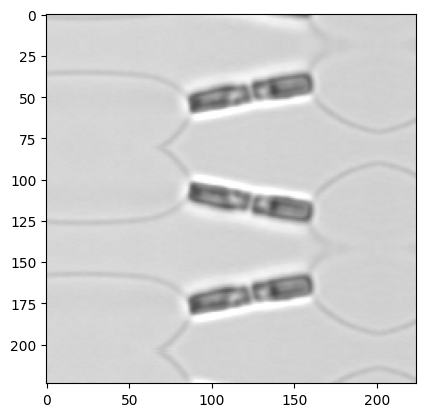

Label: 3: Chaetoceros


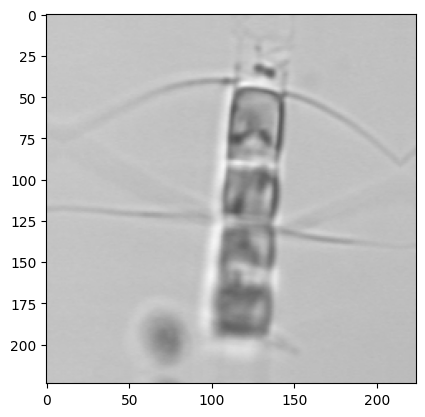

Label: 3: Chaetoceros


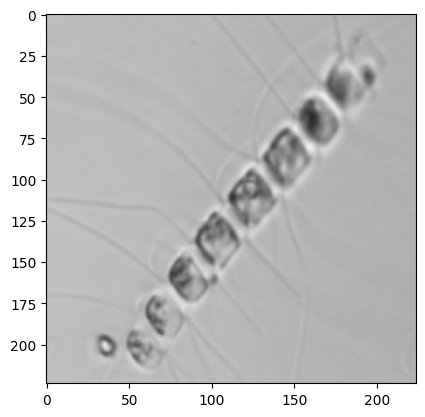

Label: 3: Chaetoceros


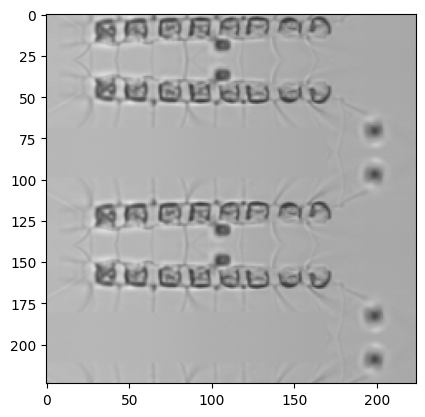

Label: 3: Chaetoceros


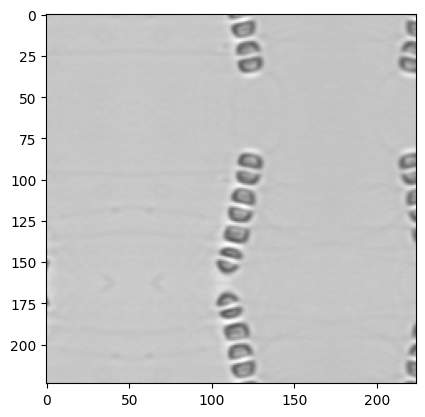

Label: 3: Chaetoceros


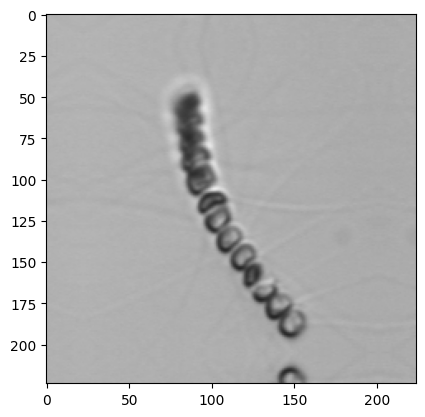

Label: 3: Chaetoceros


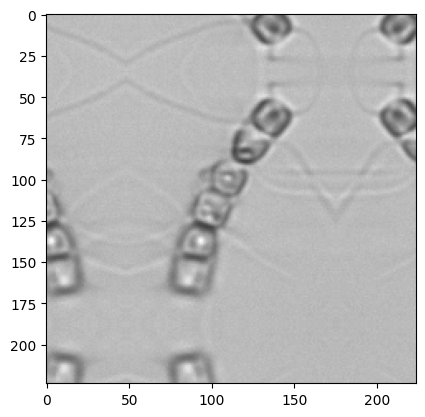

Label: 3: Chaetoceros


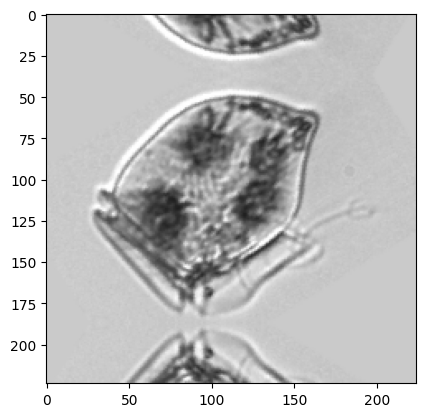

Label: 4: Dinophysis


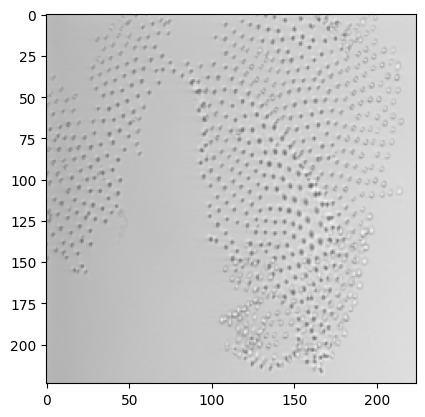

Label: 5: Phaeocystis


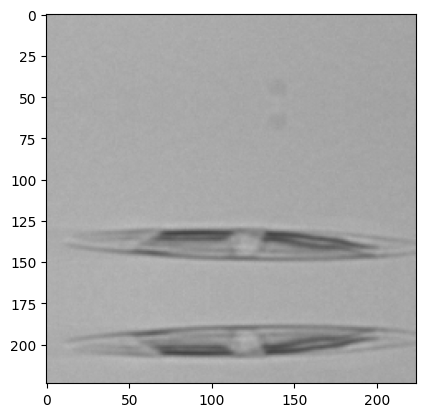

Label: 6: Pseudonitzschia


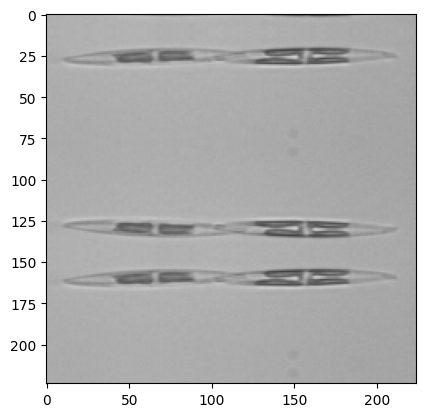

Label: 6: Pseudonitzschia


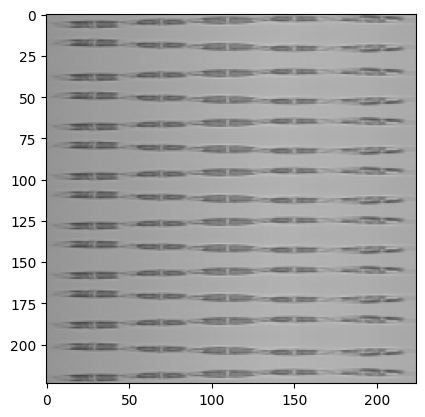

Label: 6: Pseudonitzschia


In [8]:
for i in range(0,len(train_features)-1):
    #print(i)
    img = train_features[i].squeeze()
    #print(img)
    label = train_labels[i]
    #print(img.shape)

    img = img.permute(1,2,0)
    #print(img.shape)
    plt.imshow(img)
    plt.show()
    print(f"Label: {label}: {dataset.classes[label]}")